In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams.update({'font.size': 15})

In [121]:
df = pd.read_excel("data.xlsx", header=1, usecols=range(1, 13))
df = df[df["Word"] != "study"]
df = df.sort_values(by="Date")

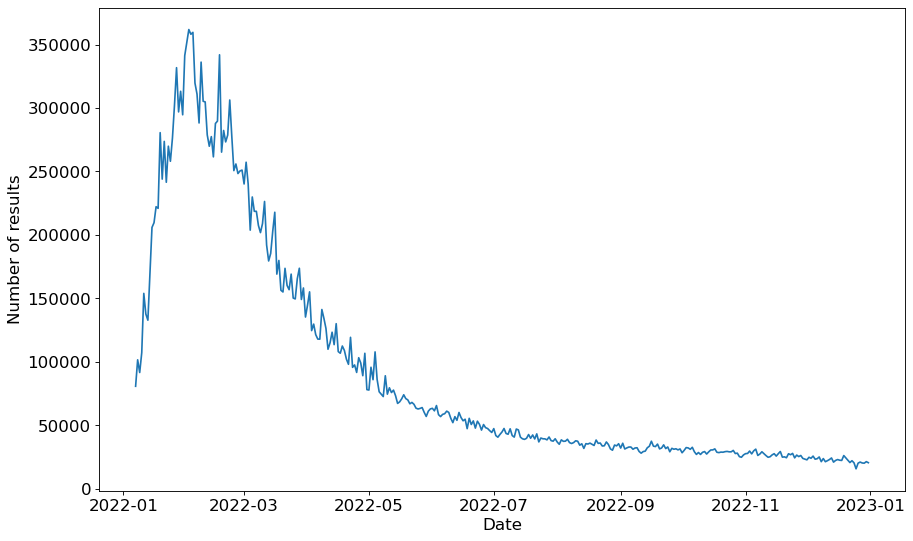

In [122]:
figure(figsize=(13, 8), dpi=80)
plt.xlabel("Date")
plt.ylabel("Number of results")
plt.plot(df["Date"], df["Number of  reported results"])

# plt.plot(df["Date"], df["Number in hard mode"])
# plt.plot(df["Date"], df["Number in hard mode"] / df["Number of  reported results"])
# df.index = pd.DatetimeIndex(df.index).to_period('d')

In [123]:
import datetime
dec = df[df["Date"] > datetime.datetime(2022, 2, 20, 0, 0, 0)]
dec = dec[["Date", "Number of  reported results"]]
dec = dec.set_index("Date")
# dec.dropna(inplace=True)
dec.index = pd.DatetimeIndex(dec.index).to_period('d')
ydata = dec["Number of  reported results"].astype(float)

In [124]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

# Build model.
ets_model = ETSModel(
    ydata, # y should be a pd.Series
    error="add",
    trend="add",
    seasonal="add",
    damped_trend=True,
    seasonal_periods=7
)
ets_result = ets_model.fit()
pred = ets_result.get_prediction(start="2022/2/21", end="2023/3/1")
res = pred.summary_frame(alpha=0.8)

Text(0, 0.5, 'Number of results')

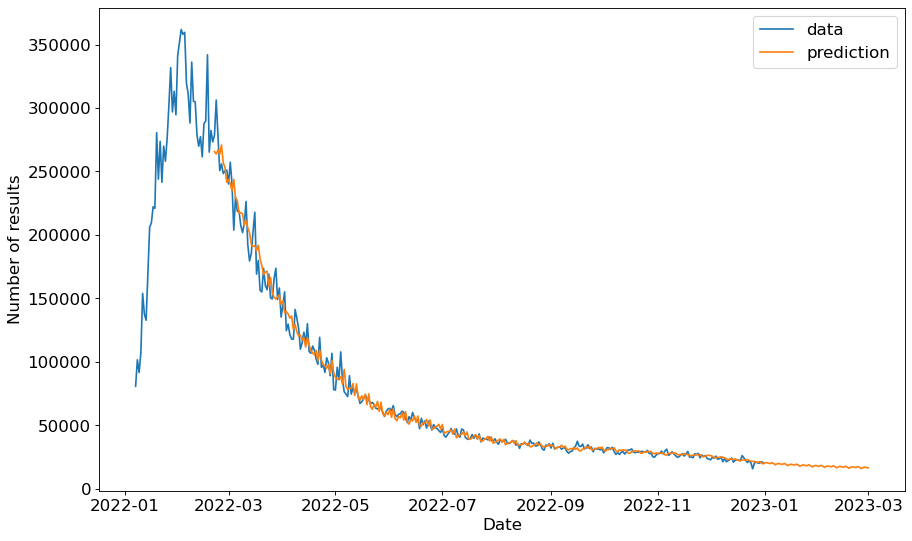

In [125]:
figure(figsize=(13, 8), dpi=80)
plt.plot(df["Date"], df["Number of  reported results"], label="data")
plt.plot(res.index, res["mean"], label="prediction")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Number of results")
# plt.plot(res.index, res["pi_lower"])
# plt.plot(res.index, res["pi_upper"])

In [126]:
df = df.set_index("Date")

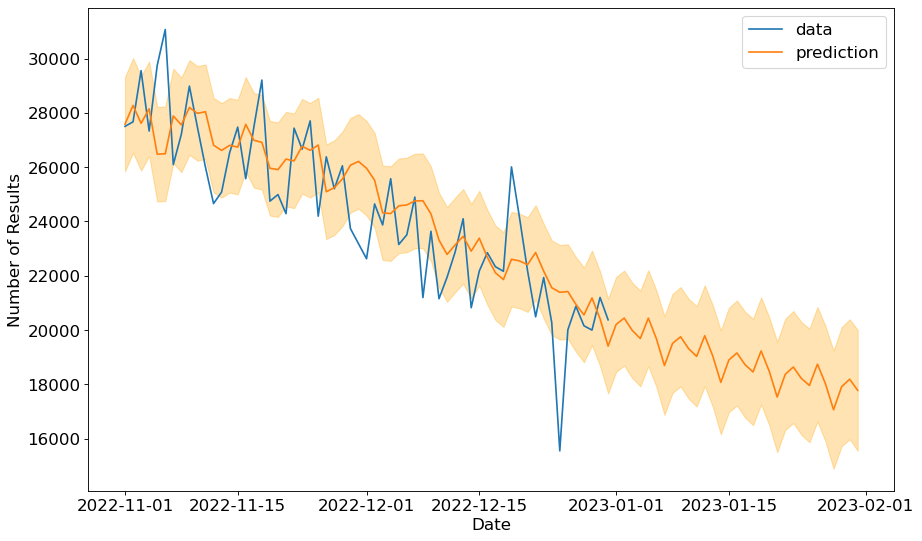

In [127]:
resslice = res["2022/11/1":"2023/1/31"]
dfslice = df["2022/11/1":"2022/12/31"]
figure(figsize=(13, 8), dpi=80)
plt.plot(dfslice.index, dfslice["Number of  reported results"], label="data")
plt.plot(resslice.index, resslice["mean"], label="prediction")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Number of Results")
plt.fill_between(resslice.index, resslice["pi_lower"], resslice["pi_upper"], color='orange', alpha=.3)
# plt.xticks(rotation=45, ha='right')

In [128]:
freq = pd.read_json("wordle/data/freq_map.json", typ='series')
for item in df["Word"]:
    if item not in freq.index:
        df = df[df["Word"] != item]
df["frequency"] = [freq[item] for item in df["Word"]]

In [129]:
import nltk
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

lexdict = dict(pos_tag(df["Word"], tagset='universal'))
df["lexical_category"] = [lexdict[item] for item in df["Word"]]
df["hardmode_ratio"] = df["Number in hard mode"] / df["Number of  reported results"]


In [130]:
opt_res["average_trials"]["slump"]

3.500930519313175

In [131]:
letter_freq = pd.read_csv("letter_freq.csv", index_col=0)
lf = letter_freq["frequency"]

opt_res = pd.read_excel("opt_res.xlsx", index_col=0)
df["difficulty"] = [opt_res["average_trials"][word]  for word in df["Word"]]

In [132]:
def if_duplicate(string):
    tmp = set()
    for letter in string:
        tmp.add(letter)
    return len(string) - len(tmp)

df["if_duplicate"] = if_duplicate(df["Word"])

In [133]:
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
reg0 = smf.ols(formula="hardmode_ratio ~ frequency", data=df).fit()
reg1 = smf.ols(formula="hardmode_ratio ~ frequency + difficulty", data=df).fit()
reg2 = smf.ols(formula="hardmode_ratio ~ frequency + difficulty + if_duplicate", data=df).fit()
reg3 = smf.ols(formula="hardmode_ratio ~ frequency + difficulty + C(lexical_category)", data=df).fit()
reg4 = smf.ols(formula="hardmode_ratio ~ difficulty + C(lexical_category)", data=df).fit()
reg5 = smf.ols(formula="hardmode_ratio ~ if_duplicate + C(lexical_category)", data=df).fit()

In [134]:
print(summary_col([reg0, reg1, reg2, reg3, reg4, reg5],stars=True,float_format='%0.2f',
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'R2':lambda x: "{:.2f}".format(x.rsquared)},
                  regressor_order = ["frequency", "difficulty", "if_duplicate"]))


                            hardmode_ratio I hardmode_ratio II hardmode_ratio III hardmode_ratio IIII hardmode_ratio IIIII hardmode_ratio IIIIII
------------------------------------------------------------------------------------------------------------------------------------------------
frequency                   -13.73**         -13.50**          -13.50**           -15.09*                                                       
                            (6.47)           (6.46)            (6.46)             (8.32)                                                        
difficulty                                   0.01              0.01               0.00                0.00                                      
                                             (0.00)            (0.00)             (0.00)              (0.00)                                    
if_duplicate                                                   0.00                                                        0.00  

In [135]:
df["average"] = (df["1 try"] + 2 * df["2 tries"] + 3 * df["3 tries"] + 4 * df["4 tries"] + 5 * df["5 tries"] + 6 * df["6 tries"] + 7 * df["7 or more tries (X)"]) / 100

Text(0.5, 0, 'Date')

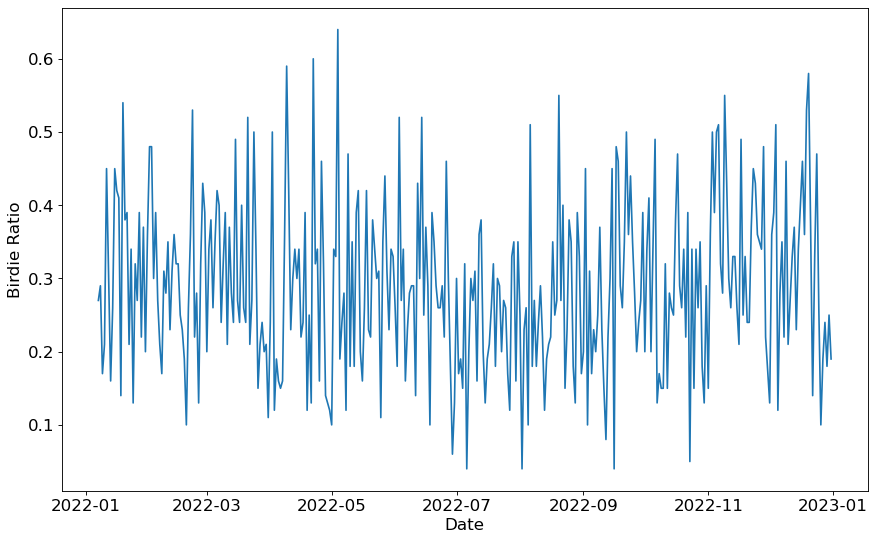

In [173]:
figure(figsize=(13, 8), dpi=80)
df["Birdie"] = df["1 try"] + df["2 tries"] + df["3 tries"]
plt.plot(df.index, df["Birdie"] / 100)
plt.ylabel("Birdie Ratio")
plt.xlabel("Date")

Text(0.5, 0, 'Date')

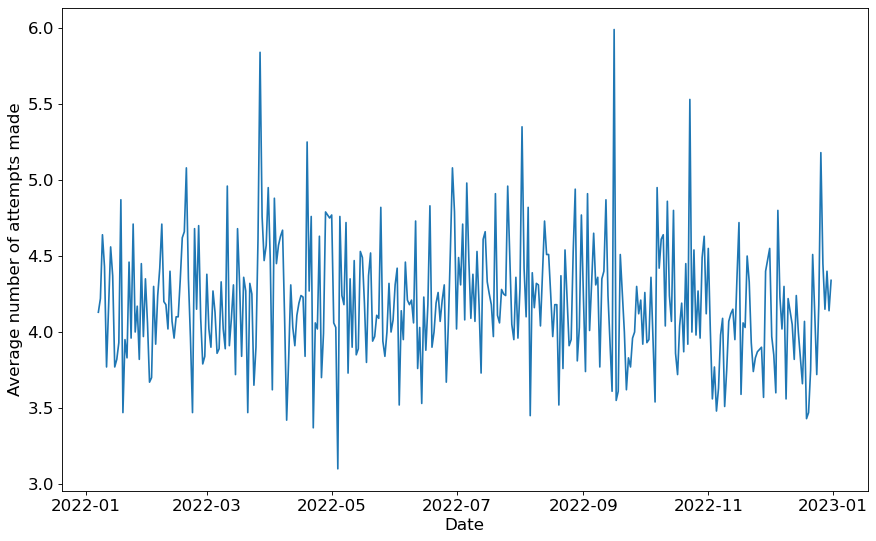

In [136]:
figure(figsize=(13, 8), dpi=80)
plt.plot(df.index, df["average"])
plt.ylabel("Average number of attempts made")
plt.xlabel("Date")

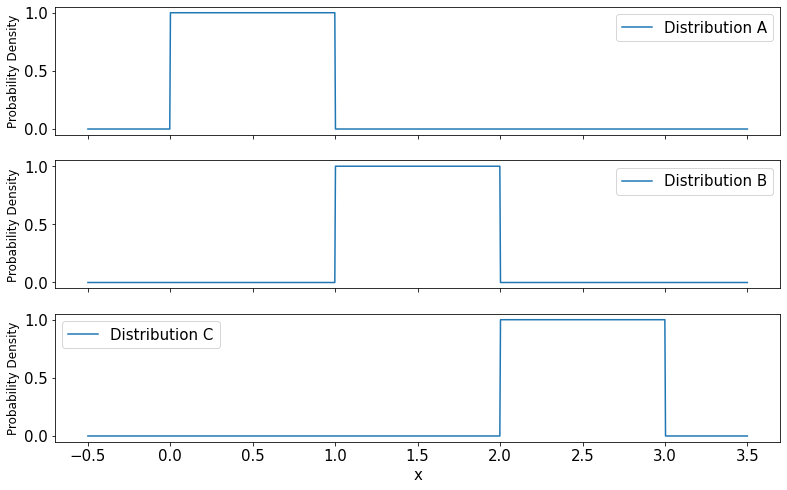

In [170]:
fig, ax = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(13, 8))
x = np.linspace(-0.5, 3.5, 1000)
y1 = (x < 1) & (x > 0)
y2 = (x < 2) & (x > 1)
y3 = (x < 3) & (x > 2)
ax[0].plot(x, y1, label="Distribution A")
ax[1].plot(x, y2, label="Distribution B")
ax[2].plot(x, y3, label="Distribution C")
ax[2].set_xlabel("x")
ax[0].legend()
ax[1].legend()
ax[2].legend()
for i in range(3):
    ax[i].set_ylabel("Probability Density", fontsize=12)